In [1]:
import pandas as pd
import numpy as np

import re
import nltk
import spacy
import tqdm as notebook_tqdm

import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

/Users/rd/opt/anaconda3/envs/anly521/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
temp = pd.read_csv("../data/commentory.csv")

In [4]:
temp['comment'] = temp['comment'].apply(lambda x: x.lower())
temp['home_team'] = temp['home_team'].apply(lambda x: x.lower())
temp['away_team'] = temp['away_team'].apply(lambda x: x.lower())

In [5]:
df_unique = pd.DataFrame(temp["match"].unique())
df_unique.reset_index(inplace=True)
df_unique.columns = ["match_id", "match"]
df = pd.merge(temp, df_unique, on = "match")
df["comment"] = df["comment"].apply(lambda x: x.strip())


In [6]:
df.to_csv("../data/commentory_matchid.csv", index=False)

In [260]:
# df_new = pd.DataFrame()

# for i in df["match_id"].unique():
#     temp = df[df["match_id"] == i]
#     temp.reset_index(inplace=True, drop=True)

#     home_team = temp["home_team"][0]
#     away_team = temp["away_team"][0]

#     temp["comment"] = temp["comment"].apply(lambda x: x.strip())

#     for i in range(len(temp)):
#         if (home_team + " subs" in temp["comment"][i]) | (
#             home_team + " subs:" in temp["comment"][i]
#         ):
#             temp["home_team_subs_info"] = temp["comment"][i]
#             temp["home_team_formation_info"] = temp["comment"][i + 1]

#         if (away_team + " subs" in temp["comment"][i]) | (
#             away_team + " subs:" in temp["comment"][i]
#         ):
#             temp["away_team_subs_info"] = temp["comment"][i]
#             temp["away_team_formation_info"] = temp["comment"][i + 1]

#         else:
#             continue

#         df_new = df_new.append(temp)
#         df_new.reset_index(inplace=True, drop=True)


In [318]:
# df_new = pd.DataFrame()

# for i in df["match_id"].unique():
#     temp = df[df["match_id"] == i]
#     temp.reset_index(inplace=True, drop=True)

#     home_team = temp["home_team"][0]
#     away_team = temp["away_team"][0]

#     temp["comment"] = temp["comment"].apply(lambda x: x.strip())
    
#     home_subs = ""
#     home_formation = ""
#     away_subs = ""
#     away_formation = ""

#     for i in range(len(temp)):
        
#         if (home_team + " subs" in temp["comment"][i]):
#             home_subs = temp["comment"][i]
#             home_formation = temp["comment"][i + 1]
            
#         elif (home_team + " substitutes" in temp["comment"][i]):
#             home_subs = temp["comment"][i]
#             home_formation = temp["comment"][i + 1]

#         elif (away_team + " subs" in temp["comment"][i]):
#             away_subs = temp["comment"][i]
#             away_formation = temp["comment"][i + 1]
            
            
#         elif (away_team + " substitutes" in temp["comment"][i]):
#             away_subs = temp["comment"][i]
#             away_formation = temp["comment"][i + 1]
            
#         else:
            
#             continue
        
#         temp["home_team_subs_info"] = home_subs
#         temp["home_team_formation_info"] = home_formation
#         temp["away_team_subs_info"] = away_subs
#         temp["away_team_formation_info"] = away_formation
        
#         df_new = df_new.append(temp)
        
# df_new.reset_index(inplace=True, drop=True)


In [8]:
# df_new = pd.read_csv("../data/formation_subs.csv")
# df_new.head()

,time,comment,event,event_player,event_team,comment_desc,home_team,home_team_abbr,away_team,away_team_abbr,full_time_score,match,date,link,match_id,home_team_subs_info,home_team_formation_info,away_team_subs_info,away_team_formation_info
0,NaN,thanks for joining our commentary this evening...,NaN,NaN,NaN,full time summary,barcelona,BAR,bayern munchen,FCB,0 - 3,Barcelona vs Bayern Muenchen,9/14/21,https://www.goal.com/en/match/barcelona-vs-bay...,0,"barcelona subs: sergino dest, riqui puig, yusu...",barcelona (3-1-4-2): marc-andre ter stegen; ro...,"bayern subs: omar ricards, serge gnabry, kings...",bayern (4-2-3-1): manuel neuer; benjamin pavar...
1,NaN,barcelona are next in action at home in laliga...,NaN,NaN,NaN,full time summary,barcelona,BAR,bayern munchen,FCB,0 - 3,Barcelona vs Bayern Muenchen,9/14/21,https://www.goal.com/en/match/barcelona-vs-bay...,0,"barcelona subs: sergino dest, riqui puig, yusu...",barcelona (3-1-4-2): marc-andre ter stegen; ro...,"bayern subs: omar ricards, serge gnabry, kings...",bayern (4-2-3-1): manuel neuer; benjamin pavar...
2,NaN,bayern munich have eased past barcelona in the...,NaN,NaN,NaN,full time summary,barcelona,BAR,bayern munchen,FCB,0 - 3,Barcelona vs Bayern Muenchen,9/14/21,https://www.goal.com/en/match/barcelona-vs-bay...,0,"barcelona subs: sergino dest, riqui puig, yusu...",barcelona (3-1-4-2): marc-andre ter stegen; ro...,"bayern subs: omar ricards, serge gnabry, kings...",bayern (4-2-3-1): manuel neuer; benjamin pavar...
3,90 + 2,full-time: barcelona 0-3 bayern munich,NaN,NaN,NaN,timer,barcelona,BAR,bayern munchen,FCB,0 - 3,Barcelona vs Bayern Muenchen,9/14/21,https://www.goal.com/en/match/barcelona-vs-bay...,0,"barcelona subs: sergino dest, riqui puig, yusu...",barcelona (3-1-4-2): marc-andre ter stegen; ro...,"bayern subs: omar ricards, serge gnabry, kings...",bayern (4-2-3-1): manuel neuer; benjamin pavar...
4,90,there will be two minutes of added time.,NaN,NaN,NaN,timer,barcelona,BAR,bayern munchen,FCB,0 - 3,Barcelona vs Bayern Muenchen,9/14/21,https://www.goal.com/en/match/barcelona-vs-bay...,0,"barcelona subs: sergino dest, riqui puig, yusu...",barcelona (3-1-4-2): marc-andre ter stegen; ro...,"bayern subs: omar ricards, serge gnabry, kings...",bayern (4-2-3-1): manuel neuer; benjamin pavar...


In [300]:
# df_new['away_team_formation'] = df_new['away_team_formation_info'].apply(lambda x: re.findall(r'\(.*?\)', x)[0])
# df_new['home_team_formation'] = df_new['home_team_formation_info'].apply(lambda x: re.findall(r'\(.*?\)', x)[0])

In [301]:
# df_new['home_team_formation_info'] = df_new['home_team_formation_info'].apply(lambda x: x.replace(";", ","))
# df_new['away_team_formation_info'] = df_new['away_team_formation_info'].apply(lambda x: x.replace(";", ","))
# df_new['home_team_subs_info'] = df_new['home_team_subs_info'].apply(lambda x: x.replace(";", ","))
# df_new['away_team_subs_info'] = df_new['away_team_subs_info'].apply(lambda x: x.replace(";", ","))

In [360]:
df_1 = df[df["match_id"] == 3]

In [7]:
df_formation = pd.DataFrame()
for id in df["match_id"].unique():
    
    df_1 = df[df["match_id"] == id]
    text = " ".join(df_1["comment"].values)
    pattern = r'\(\d-\d-\d-\d\)|\(\d-\d-\d\)'
    away_formation = re.findall(pattern, text)[0].replace("(", "").replace(")", "")
    home_formation = re.findall(pattern, text)[1].replace("(", "").replace(")", "")
    df_1["away_formation"] = away_formation
    df_1["home_formation"] = home_formation
    
    df_formation = df_formation.append(df_1)

In [399]:
# df_formation.reset_index(inplace=True, drop=True)

In [401]:
# df_formation["home_formation"].value_counts()

4-3-3      2991
4-2-3-1    1982
4-4-2      1355
3-4-3      1101
3-5-2       868
3-4-2-1     613
4-1-4-1     400
3-1-4-2     325
4-3-1-2     234
3-4-1-2     103
4-4-1-1     100
5-3-2        87
Name: home_formation, dtype: int64

In [402]:
df_formation["away_formation"].value_counts()

4-3-3      3352
4-2-3-1    2216
4-4-2      1673
3-4-2-1     795
3-5-2       533
3-4-3       510
4-1-4-1     238
3-4-1-2     161
5-3-2       152
4-3-1-2     149
5-4-1        89
3-1-4-2      82
4-4-1-1      75
4-3-2-1      68
4-5-1        66
Name: away_formation, dtype: int64

In [454]:
# Define the player positions for each formation
formations = {
    '4-3-3': np.array([(25, 50), (50, 10), (50, 90), (90, 25), (100, 50), (90, 75), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '4-2-3-1': np.array([(25, 50), (60, 20), (75, 50), (60, 80), (120, 40), (120, 60), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '4-4-2': np.array([(25, 30), (25, 70), (75, 15), (100, 35), (100, 65), (75, 85), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '3-4-2-1': np.array([(25, 50), (60, 35), (60, 65), (100, 20), (100, 40), (100, 60), (100, 80), (155, 25), (155, 50), (155, 75)]),
    '3-5-2': np.array([(50, 35), (50, 65), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (40, 60), (80, 60), (60, 80)]),
    '3-4-3': np.array([(30, 20), (60, 20), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (40, 60), (60, 60), (80, 60)]),
    '4-1-4-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (60, 40), (40, 60), (60, 60), (80, 60), (50, 80), (90, 80)]),
    '3-4-1-2': np.array([(30, 20), (60, 20), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (60, 60), (50, 80), (90, 80)]),
    '5-3-2': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (80, 60)]),
    '4-3-1-2': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (40, 80), (80, 80)]),
    '4-5-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (70, 80)]),
    '3-1-4-2': np.array([(30, 20), (60, 20), (90, 20), (60, 40), (40, 60), (80, 60), (60, 80), (20, 50), (80, 50), (60, 70)]),
    '4-4-1-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (50, 80), (90, 80)]),
    '4-3-2-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (50, 60), (90, 60), (70, 80)]),
    '5-4-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (20, 40), (40, 40), (60, 40), (80, 40), (100, 40), (50, 60)]),
    '4-5-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (20, 40), (40, 40), (60, 40), (80, 40), (100, 40), (60, 60)]),
    '3-2-4-1': 
}

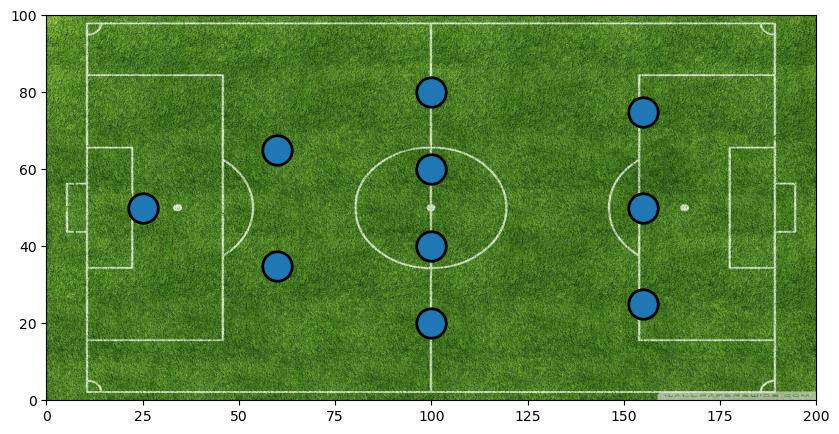

In [455]:
# Define the player positions for each formation
formations = {
    '4-3-3': np.array([(25, 50), (50, 10), (50, 90), (90, 25), (100, 50), (90, 75), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '4-2-3-1': np.array([(25, 50), (60, 20), (75, 50), (60, 80), (120, 40), (120, 60), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '4-4-2': np.array([(25, 30), (25, 70), (75, 15), (100, 35), (100, 65), (75, 85), (135, 15), (155, 40), (155, 60), (135, 85)]),
    '3-4-2-1': np.array([(25, 50), (60, 35), (60, 65), (100, 20), (100, 40), (100, 60), (100, 80), (155, 25), (155, 50), (155, 75)]),
    '3-5-2': np.array([(50, 35), (50, 65), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (40, 60), (80, 60), (60, 80)]),
    '3-4-3': np.array([(30, 20), (60, 20), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (40, 60), (60, 60), (80, 60)]),
    '4-1-4-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (60, 40), (40, 60), (60, 60), (80, 60), (50, 80), (90, 80)]),
    '3-4-1-2': np.array([(30, 20), (60, 20), (90, 20), (40, 40), (60, 40), (80, 40), (100, 40), (60, 60), (50, 80), (90, 80)]),
    '5-3-2': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (80, 60)]),
    '4-3-1-2': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (40, 80), (80, 80)]),
    '4-5-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (70, 80)]),
    '3-1-4-2': np.array([(30, 20), (60, 20), (90, 20), (60, 40), (40, 60), (80, 60), (60, 80), (20, 50), (80, 50), (60, 70)]),
    '4-4-1-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (60, 60), (50, 80), (90, 80)]),
    '4-3-2-1': np.array([(40, 20), (60, 20), (80, 20), (100, 20), (40, 40), (60, 40), (80, 40), (50, 60), (90, 60), (70, 80)]),
    '5-4-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (20, 40), (40, 40), (60, 40), (80, 40), (100, 40), (50, 60)]),
    '4-5-1': np.array([(20, 20), (40, 20), (60, 20), (80, 20), (100, 20), (20, 40), (40, 40), (60, 40), (80, 40), (100, 40), (60, 60)]),
    '3-2-4-1': 
}

formation = formations["3-5-2"]

fig, ax = plt.subplots(figsize=(10, 5))
img = plt.imread("../figures/images/pitch.jpeg")

plt.xlim(0, 200)
plt.ylim(0, 100)

ax.scatter(formation[:, 0], formation[:, 1], s = 450, edgecolors='black', linewidths=2)

ax.imshow(img, extent=[0, 200, 0, 100])

plt.show()

In [22]:
id1 = df[df["match_id"] == 0]

In [13]:
nlp = spacy.load("en_core_web_sm")

In [21]:
# NAmed Entity Recognition on pandas series
def apply_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

id1.apply(apply_ner)

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'pandas.core.series.Series'>

In [31]:
" ".join(id1["comment"])

"thanks for joining our commentary this evening. until next time, goodbye. barcelona are next in action at home in laliga against granada on monday. bayern take on bochum in their next bundesliga clash on saturday at allianz arena. bayern munich have eased past barcelona in their champions league group e opener, defeating the hosts 3-0 at camp nou. thomas muller opened the scoring as his strike from distance was deflected past marc-andre ter stegen by eric garcia. robert lewandowski then notched two second-half goals, capitalising on rebounds after jamal musiala and serge gnabry struck the post. barca were toothless themselves in the final third, failing to register a shot on target. the german outfit have set the tone for the rest of the competition. full-time: barcelona 0-3 bayern munich there will be two minutes of added time. close! coman bursts down the left flank and clips a ball across the face of goal. it skims the post on its way through and evades every bayern player in the b

In [34]:
doc = nlp(" ".join(id1["comment"]))
[(ent.text, ent.label_) for ent in doc.ents]

[('this evening', 'TIME'),
 ('barcelona', 'ORG'),
 ('granada', 'GPE'),
 ('monday', 'DATE'),
 ('saturday', 'DATE'),
 ('allianz arena', 'ORG'),
 ('bayern munich', 'PERSON'),
 ('3', 'CARDINAL'),
 ('thomas muller', 'PERSON'),
 ('eric garcia', 'PERSON'),
 ('robert lewandowski', 'PERSON'),
 ('two', 'CARDINAL'),
 ('serge gnabry', 'PERSON'),
 ('barca', 'PERSON'),
 ('third', 'ORDINAL'),
 ('german', 'NORP'),
 ('0-3', 'CARDINAL'),
 ('two minutes', 'TIME'),
 ('second', 'ORDINAL'),
 ('3', 'CARDINAL'),
 ('third', 'ORDINAL'),
 ('six yards', 'QUANTITY'),
 ('third', 'ORDINAL'),
 ('barca', 'PERSON'),
 ('this evening', 'TIME'),
 ('third', 'ORDINAL'),
 ('barca', 'PERSON'),
 ('this evening', 'TIME'),
 ('garcia', 'PERSON'),
 ('hernandez', 'ORG'),
 ('third', 'ORDINAL'),
 ('de jong', 'PERSON'),
 ('barcelona', 'GPE'),
 ('demir', 'PERSON'),
 ('5', 'CARDINAL'),
 ('6', 'CARDINAL'),
 ('2', 'CARDINAL'),
 ('german', 'NORP'),
 ('first', 'ORDINAL'),
 ('half', 'CARDINAL'),
 ('one-two', 'CARDINAL'),
 ('barca keeper', 'P

In [29]:
doc.ents

()